## Variational Autoencoders

In [1]:
import pickle, gzip
import matplotlib.pyplot as plt 
import numpy as np
import sys
%matplotlib inline

In [2]:
sys.path.append('..\\vae')
from vae import vae

In [3]:
with gzip.open('..\\resources\\mnist.pkl.gz', 'rb') as f:
    train, test, val = pickle.load(f, encoding='latin1')
    mnist = train[0]

The difference between a Variational Autoencoder and other autoencoder networks is that it explicitly learns a latent variable representation of the data. 
Our modeling assumption is that the data (in this case, handwritten digits) comes from a latent variable $z$.

$$z \sim N(0, I)$$

We want to find the posterior $P(z \mid x)$, but the computation is intractable. Other methods such as MCMC are computational expensive. The method we will use is variational inference. We will learn an approximation of the posterior $Q(z \mid x)$. We achieve by adding a regularization term that minimizes the KL divergence between the encoder output $x \sim N(\mu, \sigma^2 I)$ and the latent variable representation. 

$$D_{kl}(q || p) = -\frac{1}{2} \sum (1 + log(\sigma^2) - \mu^2 - \sigma^2) $$

The result is a generative models that can produce new images that are similar to ones it has seen.  

In [4]:
params = {
    'alpha' : 0.2,
    'max_iter' : 5,
    'activation' : (lambda x: 1 / (1 + np.exp(-x))),
    'grad_act' : (lambda x: np.exp(-x) / (1 + np.exp(-x))**2),
    'loss' : (lambda y, yhat: 0.5 * np.sum((y - yhat)**2)),
    'grad_loss' : (lambda y, yhat: y - yhat),
    'mode' : 'vae'
}

example = vae([784, 200], [784, 200], params)

### Training

Here we pass in a set of training digits. From there the network will reconstruct a latent variable representation.

In [15]:
example.train(mnist, mnist)

Now let's inspect the generated images compared to the originals. 

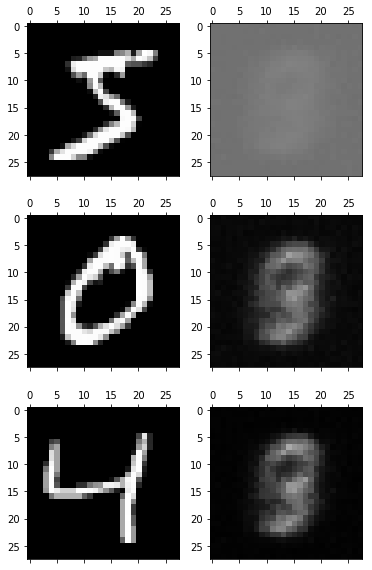

In [16]:
fig, ax = plt.subplots(3,2, figsize = (6, 10))

for i in range(3):
    in_digit = mnist[i][None,:]
    out_digit = example.predict(in_digit)
    ax[i,0].matshow(in_digit.reshape((28,28)),  cmap='gray', clim=(0,1))
    ax[i,1].matshow(out_digit.reshape((28,28)), cmap='gray', clim=(0,1))
pass

### Generating

We can now generate new images as well.

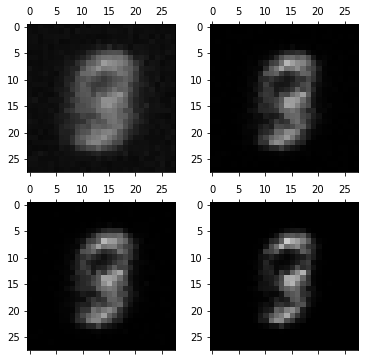

In [17]:
fig, ax = plt.subplots(2,2, figsize = (6, 6))

a = np.array([1, 3])
b = np.array([1, 3])

for i, z1 in enumerate(a):
    for j, z2 in enumerate(b):
        ax[i,j].matshow(example.generate(np.array([z1,z2])).reshape((28,28)),  cmap='gray', clim=(0,1))
pass

### References

1. [MNIST data](http://deeplearning.net/tutorial/gettingstarted.html)